<a href="https://colab.research.google.com/github/godud2604/AI-bootcamp/blob/main/ML_Classification_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
import seaborn as sns; sns.set()
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

# 1. Classification

### Machine Learning algorithms
1. K Neighbors Classifier
2. Support Vector Classifier
3. Naive Bayes
4. Decision Tree Classifier
5. Random Forest Classifier
6. Logistic Regression
7. Ensembles

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
PATH= '/content/drive/MyDrive/biodata/'

### Import dataset

- https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

**Variables or features explanations:**
1. **age**, years of age
2. **sex**, gender
  * 0: female.
  * 1: male.
3. **cp**, chest pain type.
  * 0: Typical angina(angina: 협심증)
  * 1: Atypical angina
  * 2: Non-anginal pain
  * 3: Asymptomatic (무증상)
4. **trestbps**, resting blood pressure (in mm Hg upon admission to the hospital).
5. **chol**,serum cholesterol level in mg/dl.
6. **fbs**,  fasting blood sugar > 120 mg/dl.
  * 0: no.
  * 1: yes.
7. **restecg**,resting electrocardiographic results.
  * 0: normal.
  * 1: having ST-T wave abnormality (inverted T wave and/or ST elevation or depression > 0.05 mV).
  * 2: showing probable or definite left ventricular hypertrophy(좌심실비대) by Estes' criteria.
8. **thalach**, tmaximum heart rate achieved.
9. **exang**, exercise-induced angina.
  * 0: no.
  * 1: yes.
10. **oldpeak**, ST depression induced by exercise relative to rest.
11. **slope**, slope of the peak exercise ST segment.
  * 0: upsloping.
  * 1: flat.
  * 2: downsloping.
12. **ca**, number of major vessels (0-3) colored by fluoroscopy(형광투시법).
13. **thal**, thalassemia(지중해 빈혈증).
  * 0: none.
  * 1: normal.
  * 2: fixed defect.
  * 3: reversible defect.
14. **target**, diagnosis of heart disease.
  * 0: no heart disease diagnosed.
  * 1: heart disease diagnosed.

In [33]:
dataset = pd.read_csv(PATH+'heart.csv')

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [35]:
# True인 것은 중복된 값이 있다는 것
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [36]:
# 중복된 데이터가 몇개가 있는지 체크
dataset.duplicated().sum()

723

In [37]:
# 중복된 데이터 삭제
dataset.drop_duplicates( inplace = True ) # inplace => 데이터셋 내부를 바꾸는지
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [38]:
dataset.to_csv(PATH+'heart_NOdup.csv', index=False)

In [39]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [40]:
dataset.target

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

### Data Preprocessing

In [41]:
y = dataset['target']
x = dataset.drop(['target'], axis = 1 )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33 , random_state = 0 )
print(  type(x_train), x_train.shape, type( y_train), y_train.shape)

<class 'pandas.core.frame.DataFrame'> (202, 13) <class 'pandas.core.series.Series'> (202,)


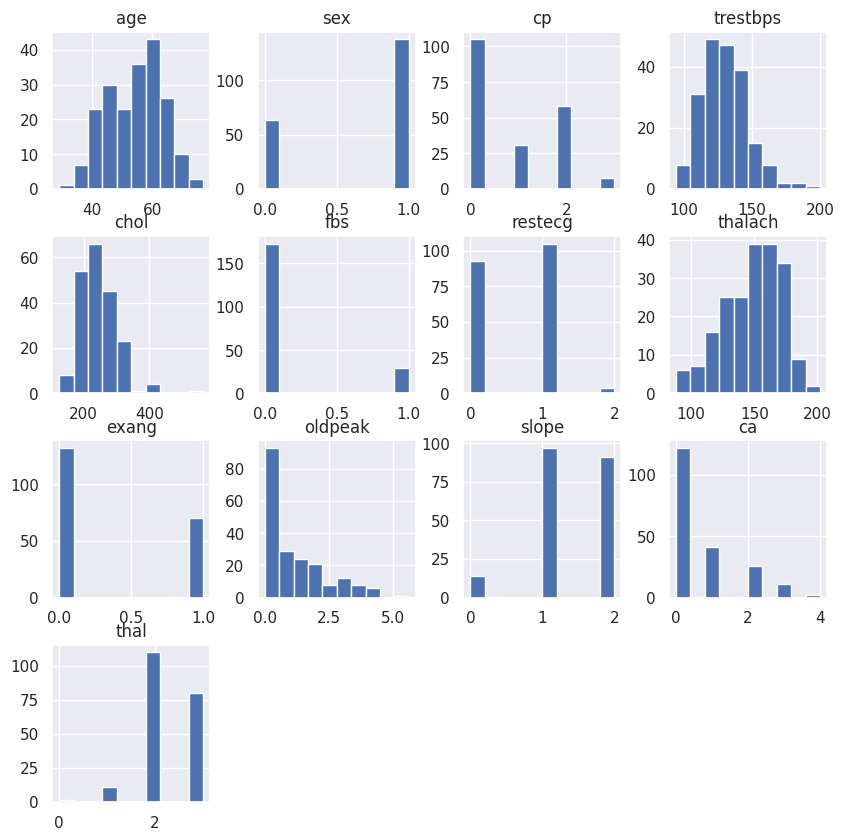

In [42]:
x_train.hist( figsize=(10,10), bins=10 )
plt.show()

In [43]:
# Standardization
standard_scaler = StandardScaler()

x_train_standard = x_train.copy()
x_test_standard = x_test.copy()
columns_to_scale =  x_train_standard.columns

# [Q] fit_transform / trainsform 하는 이유
x_train_standard[ columns_to_scale ] = standard_scaler.fit_transform( x_train_standard[ columns_to_scale ]  )
x_test_standard[ columns_to_scale ] = standard_scaler.transform( x_test_standard[ columns_to_scale ]  )

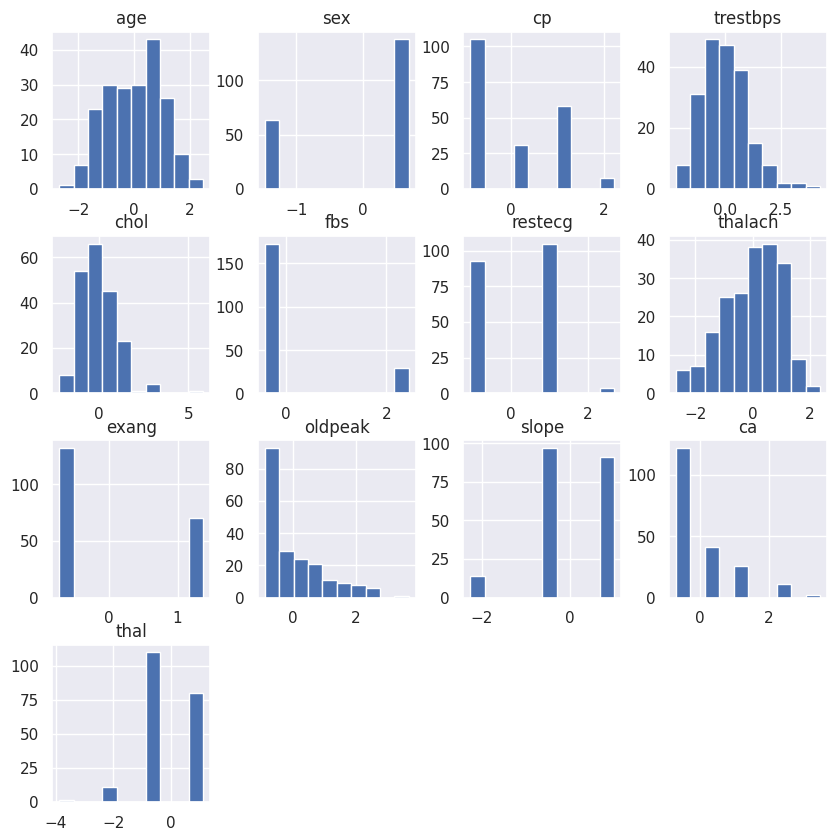

In [44]:
x_train_standard.hist( figsize=(10,10), bins=10 )
plt.show()

In [45]:
x_train_standard.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,2.020000e+02,2.020000e+02,2.020000e+02,2.020000e+02,2.020000e+02,2.020000e+02,2.020000e+02,2.020000e+02,202.000000,2.020000e+02,2.020000e+02,2.020000e+02,2.020000e+02
mean,-2.814031e-16,-1.472969e-16,2.198461e-17,6.243630e-16,1.385031e-16,2.198461e-18,-1.934646e-16,-3.825323e-16,0.000000,1.187169e-16,1.319077e-16,-2.803038e-17,2.945938e-16
std,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00,1.002484,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00
min,-2.683328e+00,-1.468418e+00,-8.723014e-01,-2.140541e+00,-2.193071e+00,-4.094265e-01,-1.045893e+00,-2.666339e+00,-0.728219,-8.894456e-01,-2.256983e+00,-6.892581e-01,-3.884610e+00
25%,-8.343946e-01,-1.468418e+00,-8.723014e-01,-5.849687e-01,-7.075052e-01,-4.094265e-01,-1.045893e+00,-7.316161e-01,-0.728219,-8.894456e-01,-6.228950e-01,-6.892581e-01,-5.525879e-01
50%,4.987796e-02,6.810052e-01,-8.723014e-01,1.332840e-02,-9.956575e-02,-4.094265e-01,8.237563e-01,1.478034e-01,-0.728219,-3.998870e-01,-6.228950e-01,-6.892581e-01,-5.525879e-01
75%,7.465775e-01,6.810052e-01,1.188574e+00,6.116255e-01,4.855188e-01,-4.094265e-01,8.237563e-01,7.194262e-01,1.373213,5.792302e-01,1.011193e+00,3.497728e-01,1.113423e+00
max,2.461530e+00,6.810052e-01,2.219012e+00,4.201408e+00,5.815273e+00,2.442441e+00,2.693406e+00,2.346352e+00,1.373213,3.679768e+00,1.011193e+00,3.466865e+00,1.113423e+00


In [46]:
# MinMax scaling
minmax_scaler = MinMaxScaler()

x_train_minmax = x_train.copy()
x_test_minmax = x_test.copy()
columns_to_scale = x_train_minmax.columns

x_train_minmax[ columns_to_scale ] = minmax_scaler.fit_transform( x_train_minmax[ columns_to_scale ]  )
x_test_minmax[ columns_to_scale ] = minmax_scaler.transform( x_test_minmax[ columns_to_scale ] )

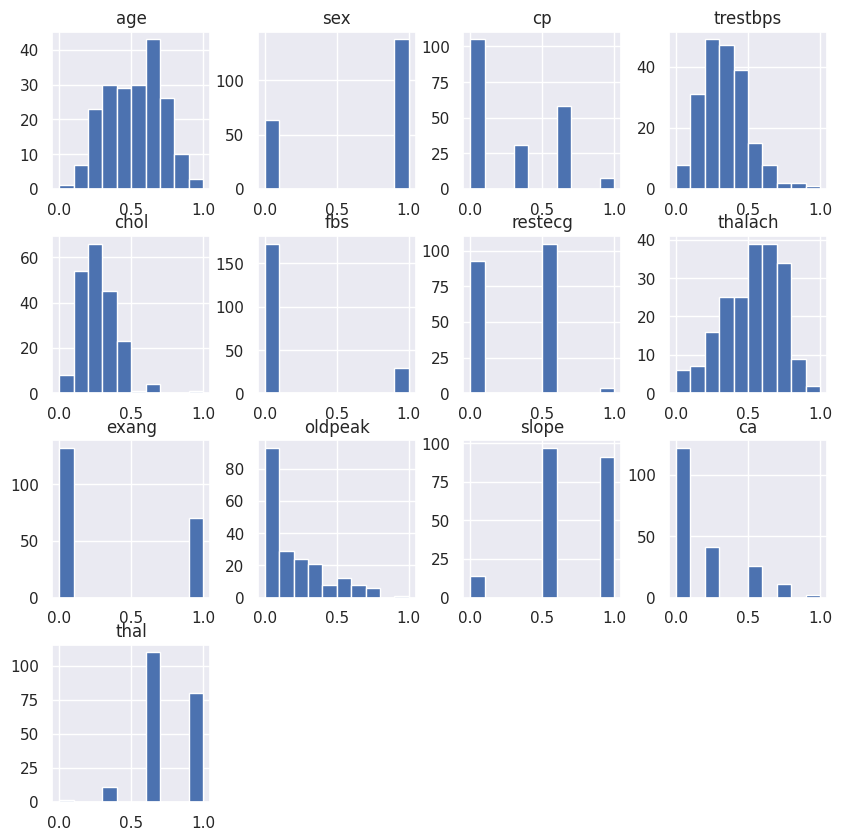

In [47]:
x_train_minmax.hist( figsize=(10,10), bins=10 )
plt.show()

In [48]:
x_test_minmax.max()

age         0.854167
sex         1.000000
cp          1.000000
trestbps    0.924528
chol        0.520548
fbs         1.000000
restecg     0.500000
thalach     0.938596
exang       1.000000
oldpeak     1.107143
slope       1.000000
ca          1.000000
thal        1.000000
dtype: float64

In [49]:
x_train_minmax.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.521555,0.683168,0.282178,0.337521,0.273848,0.143564,0.279703,0.531918,0.346535,0.194661,0.690594,0.165842,0.777228
std,0.194852,0.466397,0.324291,0.158072,0.125180,0.351519,0.268094,0.199989,0.477048,0.219400,0.306741,0.241207,0.200576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359375,0.000000,0.000000,0.245283,0.185502,0.000000,0.000000,0.385965,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.531250,1.000000,0.000000,0.339623,0.261416,0.000000,0.500000,0.561404,0.000000,0.107143,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.334475,0.000000,0.500000,0.675439,1.000000,0.321429,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## K Neighbors Classifier

In [50]:
knn_scores = []
n_values = range( 1, 20, 2 )
for k in n_values:
    knn_classifier = KNeighborsClassifier(n_neighbors = k )
    knn_classifier.fit( x_train_minmax , y_train  )  # x 는 minmax, y는 default
    knn_scores.append(knn_classifier.score( x_test_minmax, y_test  )) # append는 test 데이터로

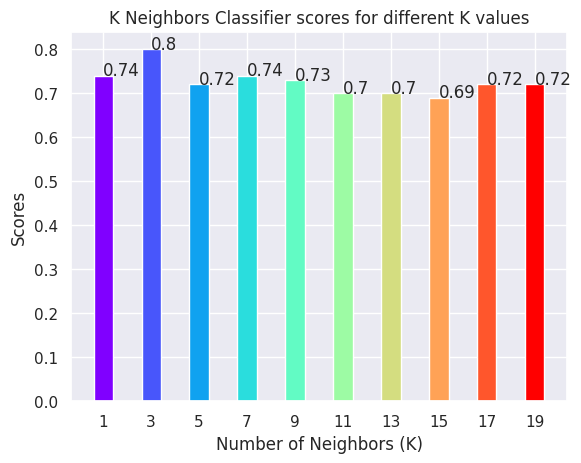

In [51]:
colors = rainbow(np.linspace(0, 1, len(n_values)) )
plt.bar(n_values, knn_scores, color = colors)

for i, n  in zip(range(len(n_values)), n_values):
    plt.text( n , knn_scores[i], knn_scores[i])

plt.xticks(n_values )
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [52]:
max_idx = np.argmax( np.array(knn_scores) ) # argmax : index 찾는것
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[max_idx]*100,
                                                                              n_values[max_idx]) )

The score for K Neighbors Classifier is 80.0% with 3 nieghbors.


In [55]:
# 위의 방법을 GridSearchCV로 사용해봄.

from sklearn.model_selection import GridSearchCV

# 가장 좋은 k 값 도출
grid = GridSearchCV(KNeighborsClassifier(), { "n_neighbors": [ x for x in range(1, 20, 2)] })
grid.fit( x_train_minmax, y_train )

print(grid.best_score_)
print(grid.best_params_) # => 5

"""
문제점 => gridsearchCV는 훈련 데이터 기준 가장 좋은 성능을 찾는다.
     => 따라서 위의 k=3의 정답과 다르다.
     => 문제점떄문에 gridsearchCV를 쓰지 않을 것
     => 성능이 가장 좋은 것을 찾았다고 말할 수 없다
"""

0.8369512195121951
{'n_neighbors': 5}


In [58]:
model = grid.best_estimator_

model.fit( x_train_minmax, y_train )
model.score( x_test_minmax, y_test )

0.72

## Support Vector Classifier
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [59]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(  x_train_standard , y_train  ) # train
    svc_scores.append(svc_classifier.score(  x_test_standard , y_test )) # test

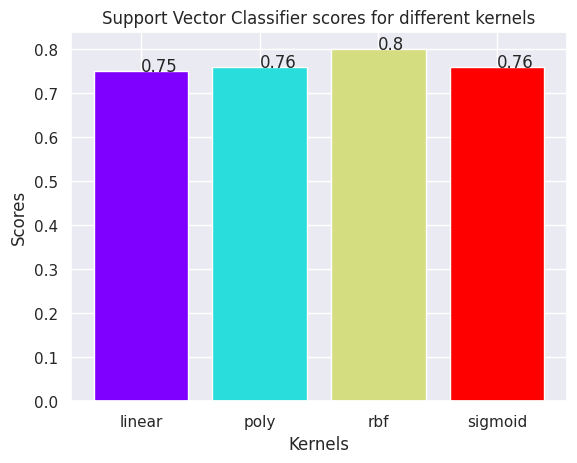

In [60]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.show()

In [61]:
max_idx = np.argmax( np.array(svc_scores) )
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[max_idx]*100,
                                                                              kernels[max_idx]))

The score for Support Vector Classifier is 80.0% with rbf kernel.


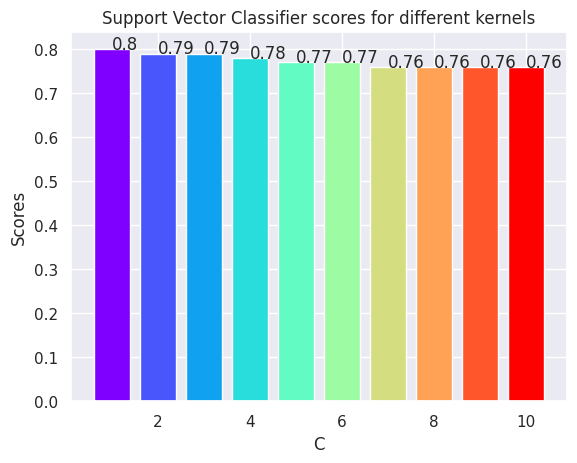

The score for Support Vector Classifier is 80.0% with c=1 .


In [62]:
svc_scores = []

c_values =  list( range( 1, 11 ) )
for c in c_values:
    svc_classifier = SVC(kernel = 'rbf', C = c )
    svc_classifier.fit(  x_train_standard , y_train )
    svc_scores.append(svc_classifier.score(  x_test_standard , y_test ))

colors = rainbow(np.linspace(0, 1, len(c_values)))
plt.bar(c_values, svc_scores, color = colors)

for i, c in zip( range( len(c_values)), c_values) :
    plt.text(c, svc_scores[i], svc_scores[i])

plt.xlabel('C')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.show()

max_idx = np.argmax( np.array(svc_scores) )
print("The score for Support Vector Classifier is {}% with c={} .".format(svc_scores[max_idx]*100,
                                                                              c_values[max_idx]))

In [63]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [67]:
1.7976931348623157e+308 == 1.79e+300

False

## Decision Tree Classifier
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
dt_scores = []
feature_importances = []
n_max_features =

for i in n_max_features:
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(  x , y  )
    dt_scores.append(dt_classifier.score(  x , y  ))

In [ ]:
colors = rainbow(np.linspace(0, 1, len(n_max_features))   )
plt.bar(n_max_features, dt_scores, color = colors)

for i in n_max_features:
    plt.text(i, dt_scores[i-1], dt_scores[i-1])
plt.xticks(n_max_features)
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')
plt.show()

In [ ]:
max_idx = np.argmax( np.array(dt_scores) )
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[max_idx]*100,max_idx+1))

## Random Forest Classifier

In [ ]:
rf_scores = []
estimators = [ ]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(  x , y  )
    rf_scores.append(rf_classifier.score(  x , y ))

In [ ]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar(range(len(estimators)), rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks =  range(len(estimators)),
           labels =  estimators)
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')
plt.show(

In [ ]:
max_idx = np.argmax( np.array(rf_scores) )
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[max_idx]*100,
                                                                                 estimators[max_idx]))

# 앙상블 분류기

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors= )
nb_clf = GaussianNB()
rndf_clf = RandomForestClassifier(n_estimators = , random_state = 0)
svm_clf = SVC( kernel =  )
dt_clf = DecisionTreeClassifier(max_features = , random_state = 0)

voting_clf = VotingClassifier(
              estimators=[('dt', dt_clf),
                          ('nb', nb_clf),
                          ('knn', knn_clf),
                          ('rndf', rndf_clf),
                          ('svm', svm_clf) ],
              voting=  )

In [ ]:
# 학습 & 성능 확인
from sklearn.metrics import accuracy_score

clfList= [dt_clf, knn_clf, nb_clf, rndf_clf, svm_clf, voting_clf]
for clf in clfList:
    clf.fit(  x , y  )
    pred = clf.predict(  x , y )
    print(f"{clf.__class__.__name__:23s}: {accuracy_score( y, pred ):.3f}")

# 2. Regression

## (1) Linear Regression

###  다중회귀 분석

### Dataset
- https://github.com/stedy/Machine-Learning-with-R-datasets

In [ ]:
dataset = pd.read_csv(PATH + 'insurance.csv')
dataset.head()

In [ ]:
dataset.info()

In [ ]:
dataset.duplicated()

In [ ]:
dataset

In [ ]:
dataset.describe()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
dataset.plot(kind= , y="age", bins=70, color="b", ax=axes[0][0])
dataset.plot(kind= , y="bmi", bins=200, color="r", ax=axes[0][1])
dataset.plot(kind= , y="children", bins=5, color="g", ax=axes[1][0])
dataset.plot(kind= , y="charges", bins=200, color="orange", ax=axes[1][1])
plt.show()

In [ ]:
(x="sex", kind="count", palette="Set1", data=dataset)
plt.show()

In [ ]:
dataset['age_range'] = dataset['age']

In [ ]:
dataset

In [ ]:
# Visualising Categorical Variables
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
(x = 'smoker', y = 'charges', data = dataset)
plt.title('Smoker vs Charges',fontweight="bold", size=20)

plt.subplot(2,3,2)
(x = 'children', y = 'charges', data = dataset)
plt.title('Children vs Charges',fontweight="bold", size=20)

plt.subplot(2,3,3)
(x = 'sex', y = 'charges', data = dataset)
plt.title('Sex vs Charges',fontweight="bold", size=20)

plt.subplot(2,3,4)
(x = 'region', y = 'charges', data = dataset, palette="bright")
plt.title('Region vs Charges',fontweight="bold", size=20)

plt.subplot(2,3,5)
(x = 'age_range', y = 'charges', data = dataset)
plt.title('Age vs Charges',fontweight="bold", size=20)
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
(dataset.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

## Data Preparation

In [ ]:

dataset['gender'] = dataset['sex'] ({'female':  , 'male':  })
dataset['smoking'] = dataset['smoker'] ({'no':  , 'yes':   })
dataset['location'] = dataset['region'] ({ 'northeast':  , 'northwest': ,
                                             'southeast': , 'southwest':   })

In [ ]:
x = dataset[   ]
y = dataset


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=  , random_state=  )

### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(  )
reg.fit( x, y )

In [ ]:
for feature_name, coef in zip(x_train.columns, reg.coef_):
    print(f"coef of {feature_name:10s} : {coef:15.3f}" )

print( f'intercept : {reg.intercept_:.3f}')

In [ ]:
def evaluation(x, y, model) :
    from sklearn import metrics
    y_pred = model.predict(x)
    mab = metrics.mean_absolute_error(y, y)
    mse = metrics.mean_squared_error(y, y)
    r2_score = metrics.r2_score(y, y)
    rmse = metrics.mean_squared_error(y, y)
    print("mean_absolute_error : ", mab)
    print("mean_squared_error  : ", mse)
    print("root_mean_squared_error", rmse)
    print("R2_score            : ", r2_score)


In [ ]:
evaluation(x, y, reg)

In [ ]:
def compare(true, pred):
    d = pd.DataFrame()
    d["Actual"] =
    d["Predict"] =
    d["residual"] =
    return d

In [ ]:
y_pred = reg.predict( x )
compare(  ,  )

##  Polynomial regression
- https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features =  PolynomialFeatures( )
x_train_poly = polynomial_features
x_test_poly = polynomial_features


polynomial_reg = LinearRegression(fit_intercept = True  )
polynomial_reg.fit( x, y  )

In [ ]:
evaluation(  x, y , polynomial_reg )

In [ ]:
y_pred = polynomial_reg.predict( x )
compare(  ,  )

## (2) Logistic Regression

In [ ]:
dataset = pd.read_csv(PATH+'heart_NOdup.csv')
dataset.info()

In [ ]:
y = dataset['target']
x = dataset.drop(['target']   )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  , random_state = 0 )

In [ ]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(fit_intercept= True  ).fit( x, y  )

In [ ]:
log_clf.coef_

In [ ]:
log_clf.intercept_

In [ ]:
pred = log_clf.predict(  )
print(confusion_matrix(   ,   ))